In [1]:
# chargement des bibliotheques .......

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
np.set_printoptions(precision=3, suppress=True)
print(tf.__version__)


2.6.0


In [3]:
# chargement du dataset..........


dataset = pd.read_csv('CAC40_2021_2023.csv') 
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA


In [4]:
# nombre de lignes et de colonnes

dataset.shape

(28564, 8)

In [5]:
# suppression des colonnes inutiles............

dataset=dataset.drop(['Date','Stock'], axis=1)

In [6]:
# divisions les données en un ensembles d'entrainement et de test...............

# utilisation de l'ensemble des données de test pour l'évaluation finale.........

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print('Nombre de lignes l entrainement',train_dataset.shape)
print('Nombre de lignes pour les test', test_dataset.shape)

Nombre de lignes l entrainement (22851, 6)
Nombre de lignes pour les test (5713, 6)


In [7]:
# séparation  les entités des étiquettes...........
# séparation de la valeur cible des caractéristiques ( features )..........
# c'est cette cible que le modele va devoir prédire.

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Close') # cible
test_labels = test_features.pop('Close') # cible

In [8]:
# normalisation les données avec (tf.keras.layers.Normalization)...........


normalizer = tf.keras.layers.Normalization(axis=-1)

In [9]:
normalizer.adapt(np.array(train_features))

2023-11-27 20:58:46.068572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [10]:
# Definition du modele .............

# Créez à nouveau un modèle séquentiel Keras en deux étapes avec :
# la première couche étant le normalizer ( tf.keras.layers.Normalization(axis=-1)
# défini précédemment
# nous l'adaptons  à l'ensemble des données :



linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [11]:
# compilation du modele..........

# (mean_absolute_error) est la difference entre les prédictions et les étiquettes cibles.

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error') # erreur absolue moyenne ou MAE

In [12]:
# Entrainement du modele.....

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split = 0.2)

In [15]:
# fonction d affichage....

def plot_loss(history):
  plt.plot(history.history['loss'], label='MAE')
  plt.plot(history.history['val_loss'], label='val_MAE')
  plt.ylim([0, 150])
  plt.xlabel('Epoch')
  plt.ylabel('Erreur en $ [Close]')
  plt.legend()
  plt.grid(True)

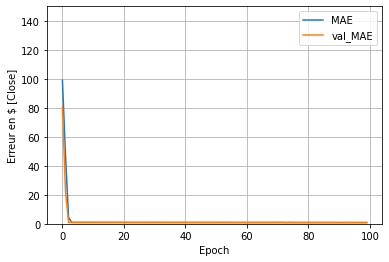

In [16]:
# Affichage .........

plot_loss(history)

In [17]:
# collecte les résultats sur le jeu de test.........

test_resultats = {}

test_resultats['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)



In [18]:
test_resultats

{'linear_model': 0.818208634853363}

In [19]:
# prédiction..........

y_pred = linear_model.predict(test_features)
print('prédiction index 1 .....',y_pred[1:2])
print('valeur attendue en position 1 et index',test_labels[1:2])

prédiction index 1 ..... [[26.707]]
valeur attendue en position 1 et index 13    26.870001
Name: Close, dtype: float64


In [20]:
# prédiction.............

y_pred = linear_model.predict(test_features)
print('prédiction index 5 .....',y_pred[5:6])
print('valeur attendue en position 5 et index',test_labels[5:6])

prédiction index 5 ..... [[26.009]]
valeur attendue en position 5 et index 43    25.34
Name: Close, dtype: float64
